In [5]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append('..')

from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
from src.data.VOC2012.data_preprocess import load_preprocess
from src.data.VOC2012.data import classes
json_file = '../data/preprocessed/VOC2012/annotations.json'
df = load_preprocess(json_file)
df.head()

,folder,filename,object,width,height,depth,object_count,img_id,class,is_object,bb_coords,bb_sizes
0,VOC2012,2007_000027.jpg,"[{'class': [14], 'is_object': [1], 'bb_coords'...",486,500,3,1,0,"[14.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[[0.3580247, 0.202], [0.0, 0.0], [0.0, 0.0], [...","[[0.3600823, 0.5], [0.0, 0.0], [0.0, 0.0], [0...."
1,VOC2012,2007_000032.jpg,"[{'class': [0], 'is_object': [1], 'bb_coords':...",500,281,3,4,1,"[0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[[0.208, 0.27758008], [0.266, 0.31316727], [0....","[[0.542, 0.37366548], [0.128, 0.12455516], [0...."
2,VOC2012,2007_000033.jpg,"[{'class': [0], 'is_object': [1], 'bb_coords':...",500,366,3,3,2,"[0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[[0.018, 0.29234973], [0.842, 0.5464481], [0.6...","[[0.98, 0.4262295], [0.122, 0.07103825], [0.17..."
3,VOC2012,2007_000039.jpg,"[{'class': [19], 'is_object': [1], 'bb_coords'...",500,375,3,1,3,"[19.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[[0.312, 0.23733333], [0.0, 0.0], [0.0, 0.0], ...","[[0.376, 0.50666666], [0.0, 0.0], [0.0, 0.0], ..."
4,VOC2012,2007_000042.jpg,"[{'class': [18], 'is_object': [1], 'bb_coords'...",500,335,3,2,4,"[18.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[[0.526, 0.09552239], [0.002, 0.10746269], [0....","[[0.474, 0.78507465], [0.468, 0.78507465], [0...."


In [95]:
df['is_object'].values[0]

array([1., 0., 0., 0.], dtype=float32)

In [87]:
df['bb_coords'].values[0]

array([[0.3580247, 0.202    ],
       [0.       , 0.       ],
       [0.       , 0.       ],
       [0.       , 0.       ]], dtype=float32)

In [104]:
input_size=32

x_train = np.array([img_to_array(Image.open(os.path.join('../data/raw/VOC2012/JPEGImages',file)).resize((256, 256))) for file in df['filename'].values[0:input_size]])

y_train_classes = np.vstack(df['object'].apply(lambda X: np.array([x['class'] for x in X])).values)
y_train_is_object = np.vstack(df['object'].apply(lambda X: np.array([x['is_object'] for x in X])).values)
y_train_bb_coord = df['object'].apply(lambda X: np.array([x['bb_coords'] for x in X])).values
y_train_bb_size = df['object'].apply(lambda X: np.array([x['bb_sizes'] for x in X])).values

y_train_classes = pad_sequences(y_train_classes, 4, padding='post')
y_train_is_object = pad_sequences(y_train_is_object, 4, padding='post')
y_train_bb_coord = pad_sequences(y_train_bb_coord, 4, dtype='float32', padding='post')
y_train_bb_size = pad_sequences(y_train_bb_size, 4, dtype='float32', padding='post')

y_train = [y_train_classes[0:input_size], y_train_is_object[0:input_size], y_train_bb_coord[0:input_size], y_train_bb_size[0:input_size]]

In [94]:
y_train_classes[0]==df['class'].values[0]

array([ True,  True,  True,  True])

In [98]:
y_train_is_object[0]

array([1, 0, 0, 0], dtype=int32)

In [99]:
y_train_bb_coord[0]

array([[0.3580247, 0.202    ],
       [0.       , 0.       ],
       [0.       , 0.       ],
       [0.       , 0.       ]], dtype=float32)

In [115]:
model.fit(x_train, y_train)

Train on 32 samples
32/32 [==============================] - 7s 209ms/sample - loss: 5.0575 - output_1_loss: 2.6403 - output_2_loss: 0.6771 - output_3_loss: 0.3118 - output_4_loss: 0.5792


In [117]:
for x_batch, y_batch in datagen.flow(x_train, y_train):
    model.fit(x_batch, y_batch)

AttributeError: 'list' object has no attribute 'items'

In [113]:
#https://github.com/keras-team/keras/issues/12639
class MultiOutputDataGenerator(ImageDataGenerator):

    def flow(self,
             x,
             y=None,
             batch_size=32,
             shuffle=True,
             sample_weight=None,
             seed=None,
             save_to_dir=None,
             save_prefix='',
             save_format='png',
             subset=None):

        targets = None
        target_lengths = {}
        ordered_outputs = []
        for output, target in y.items():
            if targets is None:
                targets = target
            else:
                targets = np.concatenate((targets, target), axis=1)
            target_lengths[output] = target.shape[1]
            ordered_outputs.append(output)


        for flowx, flowy in super().flow(x, targets, batch_size=batch_size,
                                         shuffle=shuffle):
            target_dict = {}
            i = 0
            for output in ordered_outputs:
                target_length = target_lengths[output]
                target_dict[output] = flowy[:, i: i + target_length]
                i += target_length

            yield flowx, target_dict

In [ ]:
from src.models.YOLOv3 import YOLOv3
from src.models.losses import SumSquaredError, SumSquaredSqrtError
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()
iterator = datagen.flow_from_dataframe(df,
                            directory='../data/raw/VOC2012/JPEGImages', 
                            x_col='filename', 
                            y_col=['class', 'is_object', 'bb_coords', 'bb_sizes'], 
                            target_size=(256, 256), 
                            class_mode='multi_output', 
                            batch_size=32)


model = YOLOv3(len(classes))

losses = ["sparse_categorical_crossentropy",
          'binary_crossentropy',
          SumSquaredError(),
          SumSquaredSqrtError()
         ]
loss_weights = [0.1,0.5, 5, 5]

# metrics = ['accuracy',
#           'accuracy',
#           tf.metrics.MeanIoU(num_classes=20)]
model.compile(loss=losses,loss_weights=loss_weights, optimizer='adam')

model.fit_generator(iterator, epochs=1)


Found 17125 validated image filenames.
 95/536 [====>.........................] - ETA: 35:33 - loss: 2.0845 - output_1_loss: 1.2183 - output_2_loss: 0.4819 - output_3_loss: 0.1565 - output_4_loss: 0.2766

In [11]:
model.summary()

[autoreload of src.models.YOLOv3 failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/usr/local/lib/python3.6/dist-packages/IPython

Model: "yol_ov3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  896       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
yolo_layer (YoloLayer)       multiple                  20576     
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  73856     
_________________________________________________________________
yolo_layer_1 (YoloLayer)     multiple                  82112     
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  295168    
_________________________________________________________________
yolo_layer_2 (YoloLayer)     multiple                  3280

In [40]:
model.fit(x_train, y_train, epochs=150)

Train on 32 samples
Epoch 1/150
32/32 [==============================] - 4s 116ms/sample - loss: 1.9231 - output_1_loss: 1.3054 - output_2_loss: 0.4587 - output_3_loss: 0.0706
Epoch 2/150
32/32 [==============================] - 4s 114ms/sample - loss: 1.9203 - output_1_loss: 1.3036 - output_2_loss: 0.4578 - output_3_loss: 0.0706
Epoch 3/150
32/32 [==============================] - 4s 115ms/sample - loss: 1.9174 - output_1_loss: 1.3018 - output_2_loss: 0.4569 - output_3_loss: 0.0706
Epoch 4/150
32/32 [==============================] - 4s 114ms/sample - loss: 1.9145 - output_1_loss: 1.3001 - output_2_loss: 0.4559 - output_3_loss: 0.0705
Epoch 5/150
32/32 [==============================] - 4s 115ms/sample - loss: 1.9116 - output_1_loss: 1.2983 - output_2_loss: 0.4550 - output_3_loss: 0.0705
Epoch 6/150
32/32 [==============================] - 4s 115ms/sample - loss: 1.9087 - output_1_loss: 1.2965 - output_2_loss: 0.4541 - output_3_loss: 0.0704
Epoch 7/150
32/32 [=========================

Epoch 54/150
32/32 [==============================] - 4s 116ms/sample - loss: 1.7761 - output_1_loss: 1.2243 - output_2_loss: 0.4089 - output_3_loss: 0.0692
Epoch 55/150
32/32 [==============================] - 4s 115ms/sample - loss: 1.7734 - output_1_loss: 1.2230 - output_2_loss: 0.4080 - output_3_loss: 0.0692
Epoch 56/150
32/32 [==============================] - 4s 115ms/sample - loss: 1.7708 - output_1_loss: 1.2218 - output_2_loss: 0.4070 - output_3_loss: 0.0692
Epoch 57/150
32/32 [==============================] - 4s 117ms/sample - loss: 1.7682 - output_1_loss: 1.2205 - output_2_loss: 0.4061 - output_3_loss: 0.0692
Epoch 58/150
32/32 [==============================] - 4s 116ms/sample - loss: 1.7656 - output_1_loss: 1.2193 - output_2_loss: 0.4051 - output_3_loss: 0.0691
Epoch 59/150
32/32 [==============================] - 4s 114ms/sample - loss: 1.7630 - output_1_loss: 1.2181 - output_2_loss: 0.4042 - output_3_loss: 0.0691
Epoch 60/150
32/32 [==============================] - 4s 1

Epoch 107/150
32/32 [==============================] - 4s 114ms/sample - loss: 1.6460 - output_1_loss: 1.1690 - output_2_loss: 0.3599 - output_3_loss: 0.0683
Epoch 108/150
32/32 [==============================] - 4s 115ms/sample - loss: 1.6437 - output_1_loss: 1.1681 - output_2_loss: 0.3590 - output_3_loss: 0.0683
Epoch 109/150
32/32 [==============================] - 4s 114ms/sample - loss: 1.6415 - output_1_loss: 1.1673 - output_2_loss: 0.3582 - output_3_loss: 0.0683
Epoch 110/150
32/32 [==============================] - 4s 114ms/sample - loss: 1.6392 - output_1_loss: 1.1665 - output_2_loss: 0.3573 - output_3_loss: 0.0683
Epoch 111/150
32/32 [==============================] - 4s 115ms/sample - loss: 1.6369 - output_1_loss: 1.1656 - output_2_loss: 0.3564 - output_3_loss: 0.0683
Epoch 112/150
32/32 [==============================] - 4s 114ms/sample - loss: 1.6347 - output_1_loss: 1.1648 - output_2_loss: 0.3555 - output_3_loss: 0.0683
Epoch 113/150
32/32 [==============================]

array([[4.94821161e-01, 5.35242818e-02, 2.04131249e-02, 3.36391255e-02,
        8.67184103e-02, 2.86230297e-05, 4.52090899e-05, 1.50060296e-05,
        2.02326272e-02, 3.33578973e-05, 1.38215655e-05, 1.85745023e-02,
        2.72787074e-05, 4.08610904e-05, 1.32201254e-01, 2.82469682e-05,
        2.01255530e-02, 1.16002511e-05, 6.98449090e-02, 4.96610403e-02],
       [7.34346986e-01, 2.65175756e-02, 8.89211800e-03, 1.55461924e-02,
        5.19534983e-02, 2.65761878e-06, 4.41376460e-06, 1.28803617e-06,
        8.78901593e-03, 3.49436050e-06, 1.15914918e-06, 7.98093248e-03,
        2.42492956e-06, 4.13800535e-06, 7.90168867e-02, 2.78993502e-06,
        8.27721134e-03, 8.75751311e-07, 3.20589840e-02, 2.65972596e-02]],
      dtype=float32)

95.01463732123375 84.20693874359131 221.98702043294907 280.65434098243713
73.80773243308067 53.99207025766373 126.80216073989868 183.41317772865295


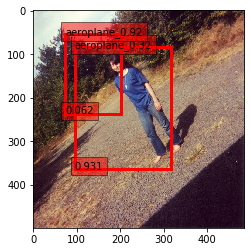

In [24]:
from src.data.VOC2012.data_preprocess import le

def plot(df_id,cls, obj, boxes_coord, boxes_size ):
    im = Image.open(os.path.join('../data/raw/VOC2012/JPEGImages', df['filename'][df_id]))
    
    plt.imshow(im)
    
    # Get the current reference
    ax = plt.gca()

    for bb_c, bb_s, o, c in zip(boxes_coord, boxes_size, obj, cls):
        if o[0] > 0:

            img_width = df['width'][df_id]
            img_height = df['height'][df_id]

            xmin = bb_c[0] * img_width
            ymin = bb_c[1] * img_height
            width = bb_s[0] * img_width
            height = bb_s[1] * img_height
            print(xmin, ymin, width, height)
        #     center_x = (xmax + xmin)/2
        #     center_y = (ymax + ymin)/2

            rect = Rectangle((xmin,ymin), width, height, fill=False, linewidth=3,edgecolor='r')
            plt.text(xmin, ymin, str(le.inverse_transform([np.argmax(c)])[0]) + '_' +str(round(c[np.argmax(c)],2)), bbox=dict(facecolor='red', alpha=0.5))
            plt.text(xmin, ymin+height, str(round(o[0],3)), bbox=dict(facecolor='red', alpha=0.5))
            ax.add_patch(rect)


#     c = Circle((center_x, center_y), radius=5, color='r' )
#     ax.add_patch(c)
#     plt.plot(center_x, center_y,markersize=100)
    plt.show()

num_predictions=1
    
pred = model.predict(x_train[0:num_predictions])
pred_cls = pred[0]
pred_obj = pred[1]
pred_bb_coord = pred[2]
pred_bb_size = pred[2]    

for i in range(num_predictions):
    plot(i, pred[0][i], pred[1][i], pred[2][i], pred [3][i])

In [19]:
from IPython.display import clear_output

119.24931335449219 118.52368712425232 135.07934939861298 140.73432981967926
102.25436389446259 77.7742862701416 49.6139879822731 54.60318922996521


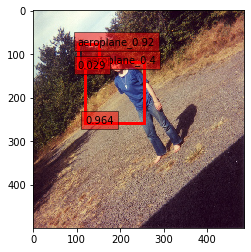

122.68447875976562 66.6103121638298 138.9705240726471 79.09269335865974
105.19996285438538 43.70914888381958 51.04319751262665 30.686992347240448


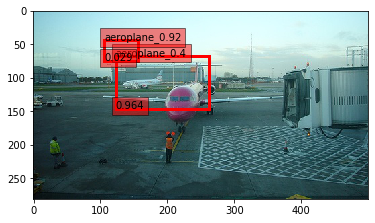

In [34]:
for i in range(50):
    model.fit(x_train, y_train, verbose=0, batch_size=1)
    pred = model.predict(x_train[0:2])
    pred_cls = pred[0]
    pred_obj = pred[1]
    pred_bb = pred[2]
    clear_output(True)
    for i in range(2):
        plot(i, pred[0][i], pred[1][i], pred[2][i], pred [3][i])